McsPyDataTools Tutorial<a id='Top'></a>
=======================

This tutorial gives an overview over the file structure of MCS HDF5 files and the usage of the McsPyDataTools toolbox to interact with these files.

- <a href='#D and I'>Downloading and installing</a>
---------------------------------------------------
- <a href='#Mcs-HDF5'>Structure of the Mcs-HDF5 file</a>
--------------------------------------------------------
- <a href='#McsData Module'>McsData Classes and Inheritance</a>
-------------------------------------------------------------------------------------------
 - ### <a href='#RD'>RawData</a> 
 - ### <a href='#R'>Recording</a> 
 - ### <a href='#S'>Stream</a>
 - ### <a href='#I'>Info</a> 
  
- <a href='#Accessing your Data with McsData'>Accessing your Data with McsData</a>
----------------------------------------------------------------------------------
 - ### <a href='#Req'>Requirements</a>
 - ### <a href='#AS'>AnalogStream</a>
 - ### <a href='#FS'>FrameStream</a>
 - ### <a href='#ES'>EventStream</a>
 - ### <a href='#SS'>SegmentStream</a>
  - #### <a href='#SC'>Subtype: Cutouts</a>
  - #### <a href='#SA'>Subtype: Averages</a>
 - ### <a href='#TS'>TimestampStream</a>
 - ### <a href='#I2'>Info</a>


Downloading and installing<a id='D and I'></a>
----------------------------------------------

Open a console or terminal and


### - With pip or setuptools

type:

    pip install McsPyDataTools
    
Or if you have setuptools installed type:

    easy_install McsPyDataTools
    

If this doesn't yield the expected result, download the most current `.zip` file from the [Multi Channel DataManager](https://www.multichannelsystems.com/software/multi-channel-datamanager) page.

From here there are 4 possible ways to get the module working (replace `{VERSION}` with the most current version of the toolbox, e.g. `0.4.0`):


### - Manually(while packed)
 
Go to your Downloads folder and run:
    
    pip install McsPyDataTools-{VERSION}.zip   
    
Or if you have setuptools installed:

    easy_install McsPyDataTools-{VERSION}.zip   
    

If the methods above fail, unpack the .zip file.

### - Manually (when unpacked) I

Go to the folder you unpacked the module to and run:
    
    pip install McsPyDataTools-{VERSION}
    
Or if you have setuptools installed:

    easy_install McsPyDataTools-{VERSION}
    
    
### - Manually (when unpacked) II

Go to the folder you unpacked the module to, go to the `McsPyDataTools_{VERSION}` folder and run the `setup.py` file from inside the folder

    python setup.py install
    
If either of the above worked there will be an `McsPyDataTools-{VERSION}-py3.6.egg`
in the site_package folder as well as an `McsPyDataTools.py` and a `PlotExperimentData.py` script in the Scripts folder of your Python installation.
    
    
### - Manually (when unpacked) III

If the other ways fail or you are still unable to import the module into a python script, you can manually place the `McsData.py` and `McsCMOS.py` scripts from the `McsPyDataTools` folder in the `\site-packages` folder of your Python installation.

Note that the folder containing your Python installation might be hidden.

This last option will only make the classes available needed to analyze HDF5 files. Any other scripts, like the `DataStreamInfo.py` or the `McsDataTools.py` script, which should get installed to the `/Scripts` folder of your python installation, are best copied into a seperate folder.

### Data

This notebook relies on some files which hold the data for the examples. These files are quite large and can be found in the subfolder **TestData** of this archive. A larger set of test data can be downloaded from https://www.multichannelsystems.com/software/multi-channel-datamanager

<a href='#Top'>Back to index</a>

Structure of the Mcs-HDF5 file<a id='Mcs-HDF5'></a>
---------------------------------------------------

With the included **DataStreamInfo.py** script, a first look can be taken at the contents of the HDF5 file.

The information about the data within the file can be viewed by calling the **DataStreamInfo.py** script from the console and handing over the exact file-path with the argument for directory and filepath: **-f**

    X:\...\python DataStreamInfo.py -f "X:\Data\Experiment_231\2014-07-09T10-17-35W8 Standard all 500 Hz.h5" 
    
If the desired file is in the same folder as **DataStreamInfo.py**, you might want to consider copying this script to your datafolder, **--f + "Filename"** can be used:

    X:\...\python DataStreamInfo.py --f "2014-07-09T10-17-35W8 Standard all 500 Hz.h5"
    
A table like this will appear:

    2014-07-09T10-17-35W8 Standard all 500 Hz.h5

    Date                 Program                     Version
    -------------------  --------------------------  ---------
    2014-07-09 10:17:35  Multi Channel Experimenter  0.9.8.2
    
    Type       Stream                                   # ch
    ---------  ---------------------------------------  ------
    Analog     Filter (1) Filter Data                   8
    Analog     Data Acquisition (1) Electrode Raw Data  8
    Analog     Data Acquisition (1) Digital Data        1
    Event      Digital Events 1
    Segment    Spike Detector (1) Spike Data
    TimeStamp  Spike Detector (1) Spike Timestamps
    
It holds information about the **Date** of the recording, the **Program** which was used as well as its **Version**. Also included is a list of **Streams** and additional information concerning these. Streams can be seen as containers of information of a certain type.

<a href='#Top'>Back to index</a>

McsData Classes and Inheritance <a id='McsData Module'></a>
---------------------------------------------------------------------------------------

This is a graphical representation of the classes and their content which may be found in an HDF5 file produced by MCS software.

<img src="./Hierarchy_short.png">

Additional information about the member methods of each class can be found in **McsData.py** or the module description file.

We also highly recommend the use of the HDF Groups **HDFView** software to help visualize and understand the structure of HDF5 files. This can make accessing the data **MUCH** easier.

<a href='#Top'>Back to index</a>

### RawData  <a id='RD'></a>

As the docstrings of the class already imply, this class is designed to hold the information of a complete MCS raw data file. 

Upon initialization with the path to your raw data

```python
    rawdata = RawData('path to your raw data')
```

member methods of this class will check if the provided file meets the version requirements to be further processed. This is necessary, as not only the way how MCS software handles the HDF5 formatted files may change but the file format itself can undergo changes.

```python
    self.__validate_mcs_hdf5_version()
```

Afterwards all information about the data stored in the file is retrieved.

```python
    self.__get_session_info()
```

When needed all recordings from the raw data file are read by

```python
    self.__read_recordings()
```

This generates a dictionary with the number of the recordings as keys, Recording\_**0**, Recording\_**1**, etc. and the values as members of the Recording class with the corresponding data. This will be important when we discuss the possibility of iterating over all datasets within one group.

<a href='#Top'>Back to index</a>

### Recording  <a id='R'></a>

The Recording class can be seen as a container for all the data gathered in one recording.

```python
    class RawData(object):
    
        ...
        
        self.__recordings[int(recording_name[1])] = Recording(value)
```

Upon initialization the values extracted by the RawData class get assigned to it.

```python
    class Recording(object):
    
        ...
        
        self.__recording_grp = recording_grp  # recording_grp = value
```
Later on these can be further decomposed by the member methods of this class into the different subtypes/children of the Stream class.

```python
    self.__read_analog_streams()
    self.__read_frame_streams()
    self.__read_event_streams()
    self.__read_segment_streams()
    self.__read_timestamp_streams()
```     
    
The data of the streams gets assigned in a similar fashion as seen before with the recordings

```python
    class Recording(object):

        ...
        
        if 'AnalogStream' in self.__recording_grp:
            
            ...
        
            self.__analog_streams[int(stream_name[1])] = AnalogStream(value)
        
    
    
    class AnalogStream(Stream):
    
        ...
        
        Stream.__init__(self, stream_grp, "AnalogStreamInfoVersion")  # stream_grp = value
```

Due to this internal structure of classes and subclasses, being only created when addressed, only small portions of the data ever get loaded at any time, speeding up the access and the computation of those values.

<a href='#Top'>Back to index</a>

### Stream <a id='S'></a>

The Stream class is the base class from which all stream types inherit. All describing metadata of the stream is read here.

Currently the following types exist:
 - AnalogStream
 - FrameStream
 - EventStream
 - SegmentStream
 - TimeStampStream
 
These streams can be further split up into single entities of the corresponding type. So FrameStream can contain several FrameEntities. These Entities finally hold the data which, once addressed, can be viewed, manipulated and/or visualized.

Additional information about the classes can be found in the html documentation.

<a href='#Top'>Back to index</a>

### Info <a id='I'></a>

In addition to the Stream classes, there is the Info class.
This is the parent class of all Info child classes that exist for the different Stream types. Info that gets stored can be timerange of ticks, units of readings, experiment specific information about dilutions, sensor id, filtersettings, etc..

<a href='#Top'>Back to index</a>

## Accessing your Data with McsData<a id='Accessing your Data with McsData'></a>

Now that the mechanism of reading data from an HDF5 file with the classes included in the McsData module is clear we can walk through some quick and easy examples of how to access and visualize your data.

### Requirements <a id='Req'></a>

First some modules need to be imported.

In [1]:
# These are the imports of the McsData module
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_

# matplotlib.pyplot will be used in these examples to generate the plots visualizing the data
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider
# These adjustments only need to be made so that the plot gets displayed inside the notebook
%matplotlib inline
# %config InlineBackend.figure_formats = {'png', 'retina'}

# numpy is numpy ...
import numpy as np

# bokeh adds more interactivity to the plots within notebooks. Adds toolbar at the top-right corner of the plot.
# Allows zooming, panning and saving of the plot
import bokeh.io
import bokeh.plotting
from bokeh.palettes import Spectral11

Sometimes running Python applications in the background can interfere with the functionalities of this notebook. To make sure that all plots are created correctly you are best advised to exit any other Python related processes.

Then, we need to define where the test data is located. This needs to be adjusted to your local setup! The McsPyDataTools toolbox includes a set of small test files in its `tests/TestData` folder. An archive with larger test files can be downloaded from the [Multi Channel DataManager](https://www.multichannelsystems.com/software/multi-channel-datamanager) page.

In [2]:
test_data_folder = r'..\\McsPyDataTools\\McsPy\\tests\\TestData' # adjust this!

<a href='#Top'>Back to index</a>

### AnalogStream<a id='AS'></a>

Next we need to access the raw data by initializing an instance of the RawData class from the McsData module by handing over the path to the file.

To check if we got access to the file we can look at its contents by printing the info that got extracted when the RawData object was initialized. This is just for demonstrational purposes and does not need to be made every time data is accessed.

In [3]:
channel_raw_data = McsPy.McsData.RawData(os.path.join(test_data_folder, '2014-07-09T10-17-35W8 Standard all 500 Hz.h5'))

In [4]:
print(channel_raw_data.comment)
print(channel_raw_data.date)
print(channel_raw_data.clr_date)
print(channel_raw_data.date_in_clr_ticks)
print(channel_raw_data.file_guid)
print(channel_raw_data.mea_name)
print(channel_raw_data.mea_sn)
print(channel_raw_data.mea_layout)
print(channel_raw_data.program_name)
print(channel_raw_data.program_version)


2014-07-09 10:17:35.172096
Mittwoch, 9. Juli 2014
635404978551720981
700b3ec2-d406-4943-bcef-79d73f0ac4d3
Linear8

Linear8
Multi Channel Experimenter
0.9.8.2


In [5]:
print(channel_raw_data.recordings)

Recording_0 <HDF5 group "/Data/Recording_0" (4 members)>
{0: <McsPy.McsData.Recording object at 0x0000016BFB38DAC8>}


In [6]:
print(channel_raw_data.recordings[0].analog_streams)

Stream_0 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (8, 9850), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (8,), type "|V100">
Stream_1 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_1" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (8, 9800), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (8,), type "|V100">
Stream_2 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_2" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (1, 9800), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (1,), type "|V100">
{0: <McsPy.McsData.AnalogStream object at 0x0000016BFB38DF28>, 1: <McsPy.McsData.AnalogStream object

Additionally, the indices or IDs of the included data structures can be addressed by calling **.keys()** on the HDF5 groups. This is due to the fact that inside of McsData, upon initialization of the different data structure types, dictionaries are created with IDs as keys and values of the data as values.

This will become more important later in this tutorial when the procedure of iterating over all data of one stream is displayed.

In [7]:
print(channel_raw_data.recordings.keys())

dict_keys([0])


So we see that there is one Recording within the raw data with index 0,

In [8]:
print(channel_raw_data.recordings[0].analog_streams.keys())

dict_keys([0, 1, 2])


and it includes 3 AnalogStreams at index 0,1 and 2

    (u'Stream_0', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>)
    (u'Stream_1', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_1" (3 members)>)
    (u'Stream_2', <HDF5 group "/Data/Recording_0/AnalogStream/Stream_2" (3 members)>)

From looking at the file with **DataStreamInfo.py** we know what these streams are.

    Type       Stream                                   # ch
    ---------  ---------------------------------------  ------
    Analog     Filter (1) Filter Data                   8      <----- Index: 0
    Analog     Data Acquisition (1) Electrode Raw Data  8
    Analog     Data Acquisition (1) Digital Data        1


So the first of the three streams is addressed like:


In [9]:
analog_stream_0 = channel_raw_data.recordings[0].analog_streams[0]

The data of the stream can be found under **.channel_data**. It is only now that the actual values from the data get accessed. Before this step, we only navigated through pointers of sorts containing information leading to the data. This behavior makes working with HDF5 so efficient.

In [10]:
analog_stream_0_data = analog_stream_0.channel_data

print(analog_stream_0_data)

<HDF5 dataset "ChannelData": shape (8, 9850), type "<i4">


By rearranging the dimensions of the data-array with the numpy function **transpose()** its dimensions are more suitable for plotting. 

In [11]:
np_analog_stream_0_data = np.transpose(analog_stream_0_data)

print("Old shape:", analog_stream_0_data.shape)
print("New shape:", np_analog_stream_0_data.shape)
print()
print(np_analog_stream_0_data)

Old shape: (8, 9850)
New shape: (9850, 8)

[[-2 -1  0 ... -5  0  2]
 [ 3 -1 -4 ...  2  5 -2]
 [-2  5  2 ... -1 -4  0]
 ...
 [ 7  0 -2 ...  0  4  6]
 [-5 -2 -2 ...  0 -3 -8]
 [ 0  3  7 ...  0  8  2]]


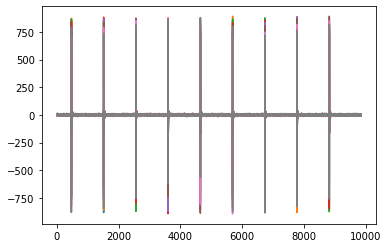

In [12]:
plt.plot(np_analog_stream_0_data)

plt.show()

A refined plots with added axis lables and title might look like this

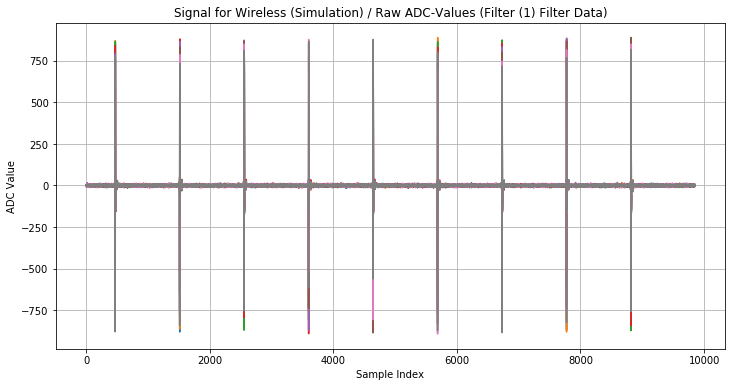

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np_analog_stream_0_data)
plt.title('Signal for Wireless (Simulation) / Raw ADC-Values (%s)' % analog_stream_0.label)
plt.xlabel('Sample Index')
plt.ylabel('ADC Value')
plt.grid()

plt.show()

If you want to look at certain portions of the data this can be achieved by specifying a range when accessing it.

To specify a range it helps to know the shape of your data. 

In [14]:
np_analog_stream_0_data = np.transpose(channel_raw_data.recordings[0].analog_streams[0].channel_data)

print(np_analog_stream_0_data.shape)

(9850, 8)


So it seems that this data-array has 9850 rows and 8 columns. 

Let's look at **rows 4400 to 4800** in **columns 4 to 7**. Notice that in the HDF5 file rows and colums are swapped. As python doesn't include the last item in range we have to add 1 to both ranges.

In [15]:
np_data_range = np_analog_stream_0_data[4500:4801, 4:8]  

print(np_data_range)

[[ 0  5 -2  5]
 [ 0  0  1  1]
 [-6 -2  0 -2]
 ...
 [-2  0 -9  0]
 [ 0 -1  5  4]
 [-5  5 -2 -4]]


And then just plot!

In [16]:
bokeh.io.output_notebook()  # see comment for bokeh module in "Requirements" section
bfig = bokeh.plotting.figure(plot_width=900, plot_height=400, title='Signal for Wireless (Simulation) / Raw ADC-Values (%s)' % analog_stream_0.label)
bfig.multi_line(
    xs = [list(range(np_data_range.shape[0]))] * np_data_range.shape[1],
    ys = [np_data_range[:, col] for col in range(np_data_range.shape[1])],
    line_color = Spectral11[0:np_data_range.shape[1]],
    alpha = 0.8
)
#bfig.line(list(range(np_data_range.shape[0])),np_data_range[:,0], alpha=0.5)
bfig.xaxis.axis_label = 'Sample Index'
bfig.yaxis.axis_label = 'ADC Value'
bfig.ygrid.minor_grid_line_color = 'navy'
bfig.ygrid.minor_grid_line_alpha = 0.1
bokeh.plotting.show(bfig)

Loading BokehJS ...

Of course other plot types can be used if desired. 


#### Draw channel with spectogram:

With the values from the second AnalogStream, 

    Type       Stream                                   # ch
    ---------  ---------------------------------------  ------
    Analog     Filter (1) Filter Data                   8
    Analog     Data Acquisition (1) Electrode Raw Data  8      <------   
    Analog     Data Acquisition (1) Digital Data        1
    Event      Digital Events 1
    Segment    Spike Detector (1) Spike Data
    TimeStamp  Spike Detector (1) Spike Timestamps

With **.get_channel_in_range(channel_id, index_start, index_end)** and **.get_channel_sample_timestamps(channel_id, index_start, index_end)** we can define a range of data and timestamps, from **index_start** to **index_end** for a specific channel with **channel_id** that we want to analyze/plot.

However, **.get_channel_sample_timestamps(channel_id, index_start, index_end)** rather than grabbing an existing data set, calculates timestamps from the **Tick** value from the InfoChannel structure of the Stream and the provided range. Also using the functions above the data internally is rearranged so no need to use any additional numpy functions here. 

The channel_IDs can be acquired by calling **.keys()** on the channel_infos of the respective stream.

In [17]:
channel_ids = channel_raw_data.recordings[0].analog_streams[1].channel_infos.keys()

print(channel_ids)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])


So there are 8 channels within the stream. We take the key at index [0]. Sure this example looks a bit like overkill, but when iterating over multiple channels, this can be a way to go.

In [18]:
channel_id = list(channel_raw_data.recordings[0].analog_streams[1].channel_infos.keys())[0]

Additional information can be accessed through **.info** on **.channel_infos[id]**

In [19]:
print(channel_raw_data.recordings[0].analog_streams[1].channel_infos[0].info)

{'ChannelID': 0, 'RowIndex': 0, 'GroupID': 0, 'Label': 'E1', 'RawDataType': 'Int', 'Unit': 'V', 'Exponent': -9, 'ADZero': 0, 'Tick': 2000, 'ConversionFactor': 381470, 'HighPassFilterType': '', 'HighPassFilterCutOffFrequency': '-1', 'HighPassFilterOrder': -1, 'LowPassFilterType': '', 'LowPassFilterCutOffFrequency': '-1', 'LowPassFilterOrder': -1}


Back to the plot. Grab the stream and the corresponding timestamps

In [20]:
stream = channel_raw_data.recordings[0].analog_streams[1]
time = stream.get_channel_sample_timestamps(channel_id, 0, 10000)

Next we recalculate the values saved in the **time** variable to seconds with the included ureg function from the McsData module and extract the data of the desired channel with its ID and a range(0 to 10000)

In [21]:
# scale time to seconds:
scale_factor_for_second = Q_(1,time[1]).to(ureg.s).magnitude
time_in_sec = time[0] * scale_factor_for_second

signal = stream.get_channel_in_range(channel_id, 0, 10000)
print("Signal: ",signal)

Signal:  (array([-0.00343323,  0.00228882, -0.00419617, ...,  0.00991822,
        0.00724793,  0.00686646]), <Unit('volt')>)


To plot the spectogram of the data we also need to get the sampling frequency. For more information about metainformation of streams and data see the chapter <a href='#I2'>Info</a>.

In [22]:
sampling_frequency = stream.channel_infos[channel_id].sampling_frequency.magnitude 

And then plot!

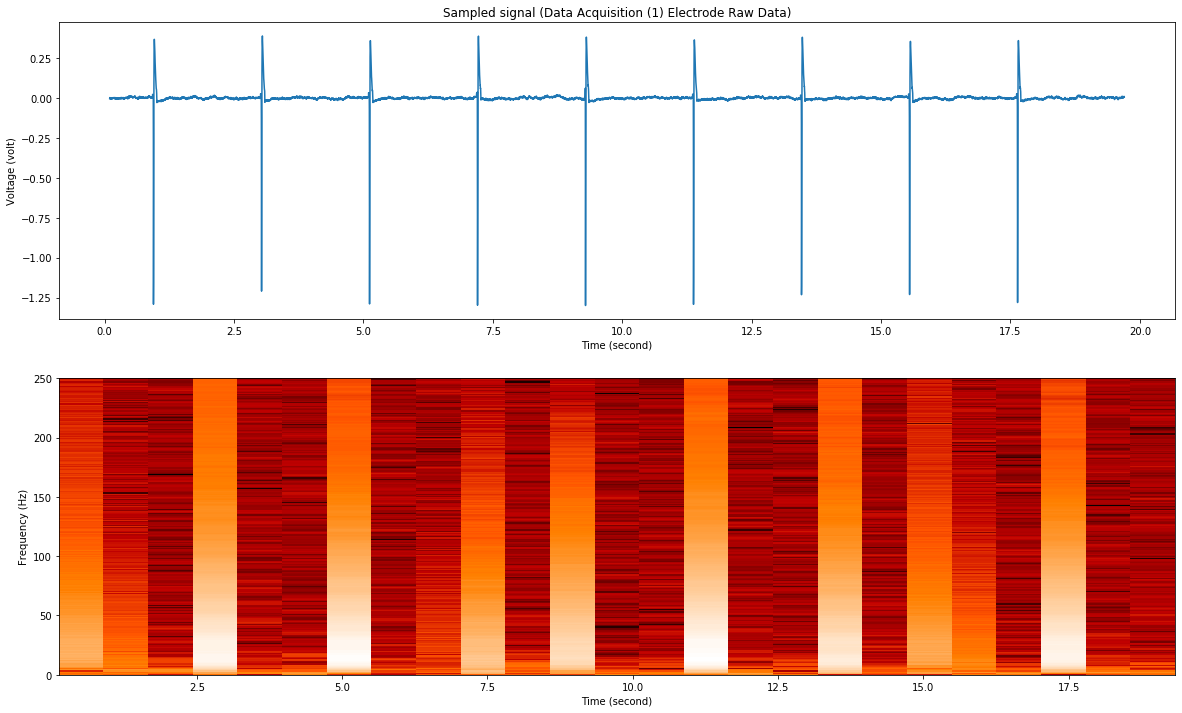

In [23]:
plt.figure(figsize=(20,12))

# Plot time domain
axtp = plt.subplot(211)
plt.plot(time_in_sec, signal[0])
plt.xlabel('Time (%s)' % ureg.s)
plt.ylabel('Voltage (%s)' % signal[1])
plt.title('Sampled signal (%s)' % stream.label)

# Plot frequency domain
plt.subplot(212)
plt.specgram(signal[0], NFFT=512, noverlap = 128, Fs = sampling_frequency, cmap = plt.cm.gist_heat, scale_by_freq = False)
plt.xlabel('Time (%s)' % ureg.s)
plt.ylabel('Frequency (Hz)')
plt.show()



#### Compare multiple streams:

To compare multiple streams they can also be plotted in one figure. 


In [24]:
bokeh.io.output_notebook()

# Assigning data
stream1 = channel_raw_data.recordings[0].analog_streams[0]
stream2 = channel_raw_data.recordings[0].analog_streams[1]
channel_id = list(channel_raw_data.recordings[0].analog_streams[1].channel_infos.keys())[0]

# Defining range
time1 = stream1.get_channel_sample_timestamps(channel_id,0,3000)
signal1 = stream1.get_channel_in_range(channel_id,0,3000)
time2 = stream2.get_channel_sample_timestamps(channel_id,0,3000)
signal2 = stream2.get_channel_in_range(channel_id,0,3000)

# Bokeh-Plot
bfig = bokeh.plotting.figure(plot_width=900, plot_height=400, title='Sampled signal overlay \'%s\' and \'%s\'' % (stream1.label, stream2.label))
bfig.multi_line(
    xs = [time1[0], time2[0]],
    ys = [signal1[0], signal2[0]],
    line_color = Spectral11[0:2],
    alpha = 0.8
)
bfig.xaxis.axis_label = 'Time (%s)' % time1[1]
bfig.yaxis.axis_label = 'Voltage (%s)' % signal1[1]
bfig.ygrid.minor_grid_line_color = 'navy'
bfig.ygrid.minor_grid_line_alpha = 0.1
bokeh.plotting.show(bfig)

Loading BokehJS ...


#### Heatmap of activity:

Heatmaps are another way of displaying raw data like it's stored in AnalogStream_1. 

In this example all data from all channels are accessed by calling **.channel_data[:, 0:10000]**.

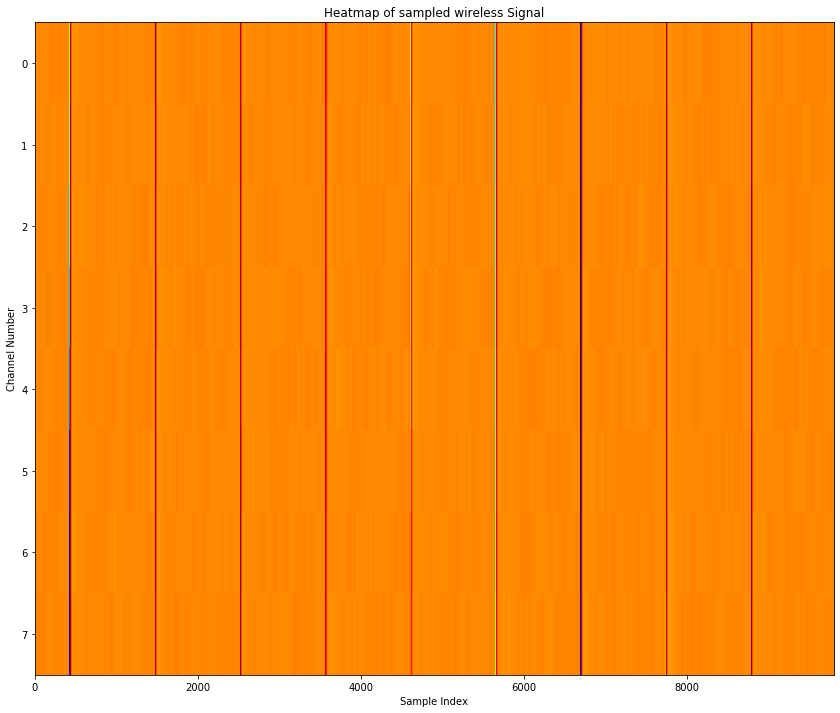

In [25]:
data = channel_raw_data.recordings[0].analog_streams[1].channel_data[:, 0:10000]
aspect_ratio = 1000

plt.figure(figsize=(20,12))
plt.set_cmap("jet")
plt.imshow(data, interpolation='nearest', aspect=aspect_ratio)
plt.xlabel('Sample Index')
plt.ylabel('Channel Number')
plt.title('Heatmap of sampled wireless Signal')
plt.show()

 <a href='#Top'>Back to index</a>

### FrameStream<a id='FS'></a>

FrameStreams are a representation of the signals recorded by the chip of a CMOS-MEA system. 

The following examples demonstrate how to access all or just some of the data in respect to sensor position on the CMOS chip or timeframe of interest.

We start of by setting the raw_data to an HDF5 file containing some FrameStream data.


In [26]:
frame_raw_data = McsPy.McsData.RawData(os.path.join(test_data_folder, 'CMOSTestRec.h5'))

print(frame_raw_data.recordings[0].frame_streams[0])

Recording_0 <HDF5 group "/Data/Recording_0" (1 members)>
Stream_0 <HDF5 group "/Data/Recording_0/FrameStream/Stream_0" (2 members)>
FrameDataEntity_0 <HDF5 group "/Data/Recording_0/FrameStream/Stream_0/FrameDataEntity_0" (3 members)>
InfoFrame <HDF5 dataset "InfoFrame": shape (1,), type "|V128">


We can see that we have one Stream with data included in our FrameStream and inside of that we have one FrameDataEntity which holds Data:

    'Stream_0'
    ->'FrameDataEntity_0'
    
For FrameStreams the ID instead of the index has to be used when accessing the data of an entity. Just like in the example for AnalogStreams we can look at the IDs by calling **.keys()** on all entities.

In [27]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity.keys())

dict_keys([1])


With **info.info** additional info can be accessed of the desired entity (frame_entity[1]).

In [28]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info)

{'FrameID': 1, 'FrameDataID': 0, 'GroupID': 1, 'Label': 'ROI 1', 'RawDataType': 'Short', 'Unit': 'V', 'Exponent': -9, 'ADZero': 0, 'Tick': 50, 'HighPassFilterType': '', 'HighPassFilterCutOffFrequency': '-1', 'HighPassFilterOrder': -1, 'LowPassFilterType': '', 'LowPassFilterCutOffFrequency': '-1', 'LowPassFilterOrder': -1, 'SensorSpacing': 1, 'FrameLeft': 1, 'FrameTop': 1, 'FrameRight': 65, 'FrameBottom': 65, 'ReferenceFrameLeft': 1, 'ReferenceFrameTop': 1, 'ReferenceFrameRight': 65, 'ReferenceFrameBottom': 65}


Keys of the dictionary can be used to access the values like this:

In [29]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info['Unit'])

V


Of course the values aren't in Volt but the unit has to be adjusted with the 'Exponent'. Here, the value of -9 indicates that the values are given in µV.

In [30]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info['Exponent'])

-9


The following code shows how the data and specific parts of it can be accessed by using **.data** and handing over a range of rows, columns, and frames.

All rows and all columns of the first frame are: 
    
    .data[:,:,0]

In [31]:
frame_data = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].data

first_frame = frame_data[:,:,0]

sensor_calc = str(len(first_frame))+" * "+str(len(first_frame[0]))+" = "+str(len(first_frame)*len(first_frame[0]))

print(frame_data)
print()
print("Each \"frame\" contains: ",sensor_calc," data points.")
print("Each point represents the value of one sensor of the CMOS chip at a given timepoint.")
print("This FrameStream consists of", frame_data.shape[2], "frames.")
print()
print("Array of the data contained in the first frame of the stream.\n",first_frame)

<HDF5 dataset "FrameData": shape (65, 65, 2000), type "<i2">

Each "frame" contains:  65 * 65 = 4225  data points.
Each point represents the value of one sensor of the CMOS chip at a given timepoint.
This FrameStream consists of 2000 frames.

Array of the data contained in the first frame of the stream.
 [[-12   0  22 ...  11  11   9]
 [ 16 -14  20 ...  21   2  12]
 [ -4  26  27 ...  35  -8 -11]
 ...
 [-10  12   2 ...   3   2   8]
 [ -6   7 -10 ...   0  -9  -6]
 [  0   0   0 ...   0   0   0]]


In order to plot a single frame (the first 65\*65 frame, index 0) we need to extract the data and multiply it by the conversion factors to adjust the values for each sensor.

In [32]:
conv_fact = np.array(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.conversion_factors)

print(conv_fact)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


Thanks to numpy's internals it is able to multiply two arrays of the same dimension like R would.

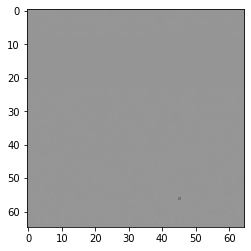

In [33]:
f_data = np.array(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].data[:,:,0])*conv_fact
plt.set_cmap("Greys") # change colors used by plot
plt.imshow(f_data, interpolation='none',vmin=-350000, vmax=350000)

#### Example of subplotted frames with defined frame interval:

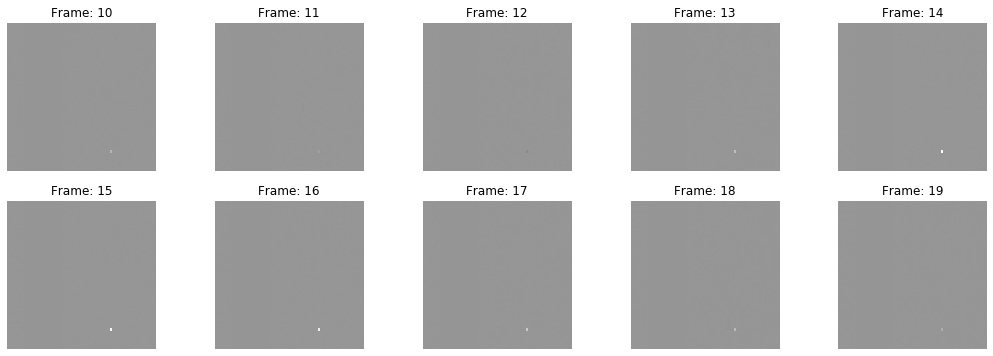

In [34]:
fig, ((ax1, ax2, ax3, ax4, ax5), ( ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, sharex='col', sharey='row')
fig.set_size_inches(18,6)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range(10,20):
    current_frame = np.transpose(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].data[:,:,i*1])*conv_fact
    ax_list[i-10].imshow(current_frame, interpolation='none', vmin=-350000, vmax=350000)
    ax_list[i-10].set_axis_off()
    ax_list[i-10].set_title("Frame: "+str(i*1))
    
plt.show()

#### Example of an interactive plot of a FrameStream within a certain time frame:

With the slider the time point that gets plotted can be defined. This value is handed over to the **make_plot** function. The interactive ipywidgets slider only works with jupyter notebooks but similar functionalities can be created with  matplotlib.widgets or by using graphical modules for python like Tkinter in regular python scripts/apps.

Plot may "flicker", a known ipywidgets.interact problem.

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, HTML

fig = plt.figure(figsize=(8,8))
plt.set_cmap("Greys")  # change colors used by plot

def make_plot(Frame=0):
    
    ffig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.set_title("Frame: "+str(Frame))
    current_frame = np.transpose(frame_data[:,:,Frame])*conv_fact
    plt.imshow(current_frame, interpolation='none', vmin=-350000, vmax=350000)
    plt.colorbar()
    #plt.axis('off')
    return HTML()  # said to slightly reduces flickering
    
   
plt.show()
       
interact(make_plot, Frame=(0, frame_data.shape[2] - 1, 1))

<Figure size 576x576 with 0 Axes>

interactive(children=(IntSlider(value=0, description='Frame', max=1999), Output()), _dom_classes=('widget-inte…

<function __main__.make_plot(Frame=0)>

Viewing the data from a single/multiple sensor/s is also possible.

The information needed to specify an area on the CMOS chip are the x/y-coordinates of the desired sensors and the indices of the frames which will be viewed. 

In this case **x-coords = 40 to 64** and **y_coords = 10 to 34** which get defined when defining the range_data variable, 

    range_data = frame_data[30:40,5:15,:]

and with timestamp indices **0 to 54** which are defined interactively by the slider.

In [36]:
fig = plt.figure(figsize=(10,10))

range_data = frame_data[40:64,10:34,:]

def make_plot(Frame=0):
    fig = plt.figure(figsize=(5,5))
    current_frame = np.array(range_data[:,:,Frame])*conv_fact[40:64,10:34]
    plt.imshow(current_frame, interpolation='none', vmin=-350000, vmax=350000)
    ax = plt.gca()
    plt.axis('off')  # don't display plot axis
    ax.set_title("Frame: "+str(Frame))
    return HTML()  # slightly reduces flickering

plt.show()
        
interact(make_plot, Frame=(0, 54, 1))

<Figure size 720x720 with 0 Axes>

interactive(children=(IntSlider(value=0, description='Frame', max=54), Output()), _dom_classes=('widget-intera…

<function __main__.make_plot(Frame=0)>

Another way of accessing the data of a single sensor is by using the .get_sensor_signal() function of the frame_entity. 

To do so, one has to provide the x/y-coordinates of the sensor that will get analyzed, as well as the range of indices that will be viewed as arguments to the **.get_sensor_signal(sensor_x, sensor_y, idx_start, edx_end)** function.

Additionally to guarantee a correct plot according to the time the data was gathered, the timestamp has to be added by calling **.get_frame_timestamps()** with the arguments **idx_start, idx_end** with the same values as the above call for the data.


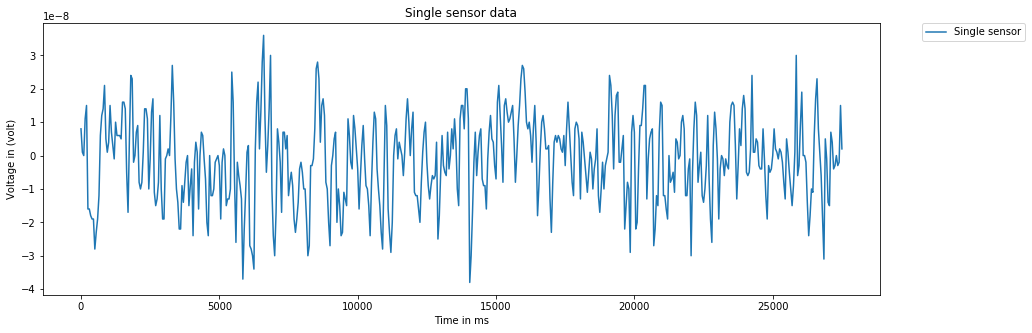

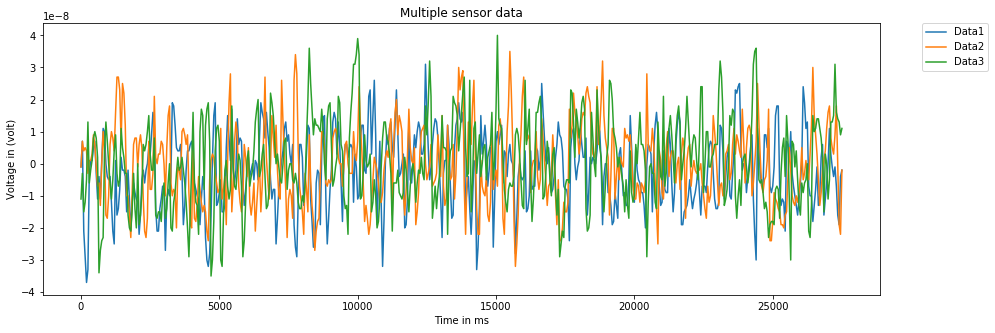

In [37]:
# Single sensor:
sensor_data = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(42,7,0,550)
sensor_timestamps = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_frame_timestamps(0,550)

fig = plt.figure(figsize=(15,5))
plt.plot(sensor_timestamps[0], sensor_data[0], label="Single sensor")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time in ms')
plt.ylabel('Voltage in (%s)' % sensor_data[1])
plt.title('Single sensor data')
plt.show()

# Multiple single sensors:
sensor_data1 = (frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(40,20,0,550),"Data1")
sensor_data2 = (frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(50,20,0,550),"Data2")
sensor_data3 = (frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(60,20,0,550),"Data3")

sensor_list = [sensor_data1 ,sensor_data2, sensor_data3]


fig = plt.figure(figsize=(15,5))

for sensor in range(3):
    plt.plot(sensor_timestamps[0], sensor_list[sensor][0][0],label = sensor_list[sensor][1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time in ms')
plt.ylabel('Voltage in (%s)' % sensor_data1[0][1])
plt.title('Multiple sensor data')
plt.show()

These plots can also be designed to be interactive:

In [40]:
# Single sensor:
fig = plt.figure(figsize=(15,5))

def single_plot(Frame=0):
    fig = plt.figure(figsize=(15,5))
    sensor_data = frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].get_sensor_signal(50,20,Frame,Frame+450)
    
    plt.plot(sensor_data[0], label="Single sensor")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Timewindow')
    plt.ylabel('Voltage in (%s)' % sensor_data[1])
    plt.title('Single sensor data, Frame: '+str(Frame))
    return HTML()  # slightly reduces flickering

plt.show()

interact(single_plot, Frame=(0, 550, 1))


<Figure size 1080x360 with 0 Axes>

interactive(children=(IntSlider(value=0, description='Frame', max=550), Output()), _dom_classes=('widget-inter…

<function __main__.single_plot(Frame=0)>

If you happen to have one of our CMOS-MEA systems, feel free to check out our example client written in Python for the CMOS-MEA-Control software, to visualize your experiments in realtime from any PC in your network.

<a href='#Top'>Back to index</a>

### EventStream<a id='ES'></a>

EventStreams can contain wide array of events predefined by the user and stored in this stream. From the beginning/end or the duration of a treatment to periodically recurring stimuli this can be everything.

In [41]:
test_raw_data_file_path = os.path.join(test_data_folder, "2014-07-09T10-17-35W8 Standard all 500 Hz.h5")

event_raw_data = McsPy.McsData.RawData(test_raw_data_file_path)

event_entity = event_raw_data.recordings[0].event_streams[0].event_entity[0]

print("EventEntity_0 contains: %s events" % event_entity.count)
all_events = event_entity.get_events()
print()
print("All events: ",all_events)
print()
print(all_events[0][0])
print()
all_event_timestamps = event_entity.get_event_timestamps()
print(all_event_timestamps[0])
print()
all_event_durations = event_entity.get_event_durations()
print(all_event_durations[0])

Recording_0 <HDF5 group "/Data/Recording_0" (4 members)>
Stream_0 <HDF5 group "/Data/Recording_0/EventStream/Stream_0" (2 members)>
EventEntity_0 <HDF5 dataset "EventEntity_0": shape (2, 12), type "<i8">
InfoEvent <HDF5 dataset "InfoEvent": shape (1,), type "|V44">
EventEntity_0 contains: 12 events

All events:  (array([[  216000,  1916000,  3616000,  5316000,  7016000,  8716000,
        10416000, 12116000, 13814000, 15514000, 17214000, 18914000],
       [       0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0]],
      dtype=int64), <Unit('microsecond')>)

[  216000  1916000  3616000  5316000  7016000  8716000 10416000 12116000
 13814000 15514000 17214000 18914000]

[  216000  1916000  3616000  5316000  7016000  8716000 10416000 12116000
 13814000 15514000 17214000 18914000]

[0 0 0 0 0 0 0 0 0 0 0 0]


More info with **.info.info**

In [42]:
print(event_entity.info.info)

{'EventID': 0, 'GroupID': 0, 'Label': '', 'RawDataType': 'Int', 'RawDataBytes': 4, 'SourceChannelIDs': '8', 'SourceChannelLabels': '1                                         \r\n'}


Visualization of this information is best combined with other data types to highlight the occurrence of events.

Depending on the data these plots don't necessarily overlap.

First we get the data we want to plot. In this case the data from the AnalogStreams and the data from the TimestampStream is extracted.

In [43]:
stream1 = event_raw_data.recordings[0].analog_streams[0]
stream2 = event_raw_data.recordings[0].analog_streams[1]
channel_id = list(event_raw_data.recordings[0].analog_streams[1].channel_infos.keys())[0]
timestamps = event_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].get_timestamps()[0]

time1 = stream1.get_channel_sample_timestamps(channel_id,0,3000)
signal1 = stream1.get_channel_in_range(channel_id,0,3000)
time2 = stream2.get_channel_sample_timestamps(channel_id,0,3000)
signal2 = stream2.get_channel_in_range(channel_id,0,3000)

Stream_0 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_0" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (8, 9850), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (8,), type "|V100">
Stream_1 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_1" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (8, 9800), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (8,), type "|V100">
Stream_2 <HDF5 group "/Data/Recording_0/AnalogStream/Stream_2" (3 members)>
ChannelData <HDF5 dataset "ChannelData": shape (1, 9800), type "<i4">
ChannelDataTimeStamps <HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">
InfoChannel <HDF5 dataset "InfoChannel": shape (1,), type "|V100">
Stream_0 <HDF5 group "/Data/Recording_0/TimeStampStream/Stream_0" (9 members)>
InfoTimeStamp <HDF5 d

Next we plot the AnalogStreams according to the Timestamps.

Then we add some vertical lines representing the Events.

Finally we define some plot properties and we are done.

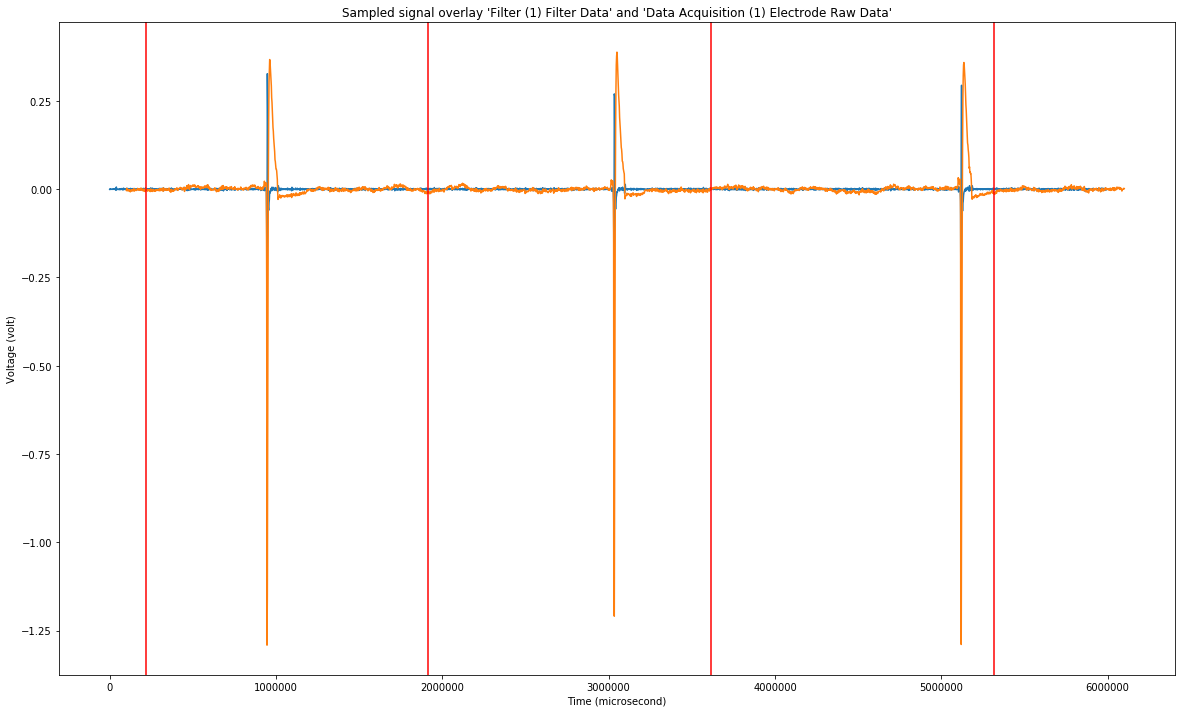

In [44]:
plt.figure(figsize=(20,12))
plt.plot(time1[0], signal1[0])
plt.plot(time2[0], signal2[0])
max_time = max(time1[0][-1],time2[0][-1])

for event in all_events[0][0]:
    if event < max_time:
        plt.axvline(event, color='r') 
        
plt.xlabel('Time (%s)' % time1[1])
plt.ylabel('Voltage (%s)' % signal1[1])
plt.title('Sampled signal overlay \'%s\' and \'%s\'' % (stream1.label, stream2.label))
plt.show()

<a href='#Top'>Back to index</a>

### SegmentStream<a id='SS'></a>

SegmentStreams are further split up into two subtypes:

- Cutouts: As the name already implies these bits of data are predefined cutouts of a certain dimension from the signal received by the electrodes.
- Averages: Are averages of those cutouts, for all cutouts at certain time points



```python
    python DataStreamInfo.py --f AnalogSegmentTimestamp.h5
```

#### Subtype: Cutouts<a id='SC'></a>

    Date                 Program    Version
    -------------------  ---------  ---------
    2014-07-25 11:30:56  MC_Rack    4.5.12.0

    Type       Stream    # ch
    ---------  --------  ------
    Analog               60
    Segment
    TimeStamp

For SegmentStreams you can extract a single entity by addressing its index.

So the first SegmentEntity at index 0 would be:

In [45]:
segment_raw_data = McsPy.McsData.RawData(os.path.join(test_data_folder, '2014-07-09T10-17-35W8 Standard all 500 Hz.h5'))

first_segment_entity = segment_raw_data.recordings[0].segment_streams[0].segment_entity[0]

print()
print("Segment entity 0 contains: %s segments" % first_segment_entity.segment_sample_count)

Recording_0 <HDF5 group "/Data/Recording_0" (4 members)>
Stream_0 <HDF5 group "/Data/Recording_0/SegmentStream/Stream_0" (18 members)>
InfoSegment <HDF5 dataset "InfoSegment": shape (8,), type "|V48">
SegmentData_0 <HDF5 dataset "SegmentData_0": shape (2, 26), type "<i4">
SegmentData_1 <HDF5 dataset "SegmentData_1": shape (2, 23), type "<i4">
SegmentData_2 <HDF5 dataset "SegmentData_2": shape (2, 30), type "<i4">
SegmentData_3 <HDF5 dataset "SegmentData_3": shape (2, 33), type "<i4">
SegmentData_4 <HDF5 dataset "SegmentData_4": shape (2, 29), type "<i4">
SegmentData_5 <HDF5 dataset "SegmentData_5": shape (2, 28), type "<i4">
SegmentData_6 <HDF5 dataset "SegmentData_6": shape (2, 29), type "<i4">
SegmentData_7 <HDF5 dataset "SegmentData_7": shape (2, 26), type "<i4">
SegmentData_ts_0 <HDF5 dataset "SegmentData_ts_0": shape (1, 26), type "<i8">
SegmentData_ts_1 <HDF5 dataset "SegmentData_ts_1": shape (1, 23), type "<i8">
SegmentData_ts_2 <HDF5 dataset "SegmentData_ts_2": shape (1, 30), t

Again a full list of of entities to iterate over can be generated with **.keys**

In [46]:
segment_stream_keys = segment_raw_data.recordings[0].segment_streams[0].segment_entity.keys()

print(segment_stream_keys)

dict_keys([7, 6, 5, 4, 3, 2, 1, 0])


The data of one of these entities can either be accessed by **.data**, but several steps have to be applied for the data to make sense when plotted.

In [47]:
data = segment_raw_data.recordings[0].segment_streams[0].segment_entity[0].data

In [48]:
data = np.reshape(data, -1, 'F')
print(len(data))

52


In [49]:
scale = segment_raw_data.recordings[0].segment_streams[0].segment_entity[0].info.source_channel_of_segment[0].adc_step.magnitude
print(scale)

0.00038147


In [50]:
data = data * scale
bokeh.io.output_notebook()  # see comment for bokeh module in "Requirements" section
bfig = bokeh.plotting.figure(plot_width=900, plot_height=400)
bfig.line(list(range(len(data))),data, alpha=0.8)
bfig.ygrid.minor_grid_line_color = 'navy'
bfig.ygrid.minor_grid_line_alpha = 0.1
bokeh.plotting.show(bfig)

Loading BokehJS ...

**.data_ts** yields the corresponding timestamps of the segment entity but to be used together similar reformating has to be done.

In [51]:
signal = first_segment_entity.get_segment_in_range(segment_id = 0, flat = True)

print(signal[0])
print(signal[1])

bokeh.io.output_notebook()  # see comment for bokeh module in "Requirements" section
bfig = bokeh.plotting.figure(plot_width=900, plot_height=400)
bfig.line(list(range(len(data))),data, alpha=0.8)
bfig.xaxis.axis_label = 'Sample Index'
bfig.yaxis.axis_label = 'Voltage (%s)' % signal1[1]
bfig.ygrid.minor_grid_line_color = 'navy'
bfig.ygrid.minor_grid_line_alpha = 0.1
bokeh.plotting.show(bfig)

[-0.09765632 -0.28266927 -0.0495911  -0.05989079 -0.01106263 -0.00648499
 -0.03776553 -0.33645654 -0.04348758 -0.05645756 -0.00915528 -0.00610352
 -0.01182557 -0.00076294 -0.00801087 -0.0038147  -0.03395083 -0.3089907
 -0.03623965 -0.06179814 -0.28305074  0.01716615 -0.02403261 -0.05836491
 -0.01373292  0.00152588 -0.21858231 -0.12359628 -0.00839234 -0.05836491
 -0.11138924 -0.26206989 -0.05264286 -0.05950932 -0.00839234  0.00267029
 -0.05378727 -0.33035302 -0.05378727 -0.05455021 -0.00915528  0.00267029
 -0.03547671 -0.33226037 -0.04920963 -0.05416874 -0.02593996 -0.30212424
 -0.03242495 -0.0648499  -0.00839234  0.01106263]
volt


Loading BokehJS ...

As you can see the above steps are rather complicated. Therefore custom functions have been already implemented in **McsPy** to make your life easier: 

**get_segment_in_range()** 

and

**get_segment_sample_timestamps()**


With this built-in function one can select ranges of these segments included in the SegmentEntities. 

If you want to plot the included data to quickly visualize it you need two things:

1. the signal itself
2. the corresponding timestamp

For this we can use **get_segment_in_range()** and **get_segment_sample_timestamps()**. Arguments that can be passed are:

- **segment_id**: Id of the SegmentData within the Entity that will be analyzed
- **flat**: False will leave data dimensions unchanged, True will convert data into a one-dimensional vector of the sequentially ordered segments
- **idx_start**: Index of the first segment that should be returned. If left unspecified will be first possible index.
- **idx_end**: Index of the last segment that should be returned If left unspecified will be last possible index.


The parameter **flat** needs to be set to True, so the data is **flattened** into a one-dimensional array and matplotlib's plot function can handle it.

Overlaying data from all segments might look like this:

In [75]:
bokeh.io.output_notebook()

signal_ts = first_segment_entity.get_segment_sample_timestamps(segment_id = 0, flat = True)

factor = ureg.convert(1, str(signal_ts[1]), "second")
signal_ts_second = signal_ts[0] * factor
segments = [segment_raw_data.recordings[0].segment_streams[0].segment_entity[i].get_segment_in_range(segment_id = 0, flat = True)[0] for i in segment_raw_data.recordings[0].segment_streams[0].segment_entity.keys()]
timestamps = [segment_raw_data.recordings[0].segment_streams[0].segment_entity[i].get_segment_sample_timestamps(segment_id = 0, flat = True)[0]*factor for i in segment_raw_data.recordings[0].segment_streams[0].segment_entity.keys()]
# Bokeh-Plot
palette=Spectral11[0:len(segments)]
bfig = bokeh.plotting.figure(plot_width=900, plot_height=400, title='Sampled Signal Segments')
bfig.multi_line(
    xs = timestamps,
    ys = segments,
    line_color=palette,
    alpha = 0.8
)
#bfig.line(signal_ts_second, segment_raw_data.recordings[0].segment_streams[0].segment_entity[i].get_segment_in_range(segment_id = 0, flat = True)[0], alpha=0.8)
bfig.xaxis.axis_label = 'Time (%s)' % ureg.s
bfig.yaxis.axis_label = 'Voltage (%s)' % signal1[1]
bfig.ygrid.minor_grid_line_color = 'navy'
bfig.ygrid.minor_grid_line_alpha = 0.1
bokeh.plotting.show(bfig)

Loading BokehJS ...

#### Subtype: Averages <a id='SA'></a>

Averages are a convenient built-in way to get precalculated values for mean and standard deviation of a collection of predefined sensors/timeframes.

Calling DataStreamInfo.py on AverageEvent.h5 reveals its content

    Date                 Program           Version
    -------------------  ----------------  ---------
    2015-04-02 16:04:26  Multiwell-Screen  1.2.1.0

    Type     Stream                              # ch
    -------  ----------------------------------  ------
    Event    Experiment State Changes_00 Atrium
    Event    Applied Dilution Series_00 Atrium
    Segment  Averages_00 Atrium
    
The file has three Streams: Two **EventStreams** which, in this case, hold information about state changes of the experiment aswell as applied dilutions and one **AverageStream**, in this case holding data from an experiment mith cardiac muscel cells. 

Data access looks like this:

In [77]:
average_raw_data = McsPy.McsData.RawData(os.path.join(test_data_folder, "20150402_00 Atrium_002.h5"))

In [78]:
average_data = average_raw_data.recordings[0].segment_streams[0]

Recording_0 <HDF5 group "/Data/Recording_0" (2 members)>
Stream_0 <HDF5 group "/Data/Recording_0/SegmentStream/Stream_0" (24 members)>
AverageData_18 <HDF5 dataset "AverageData_18": shape (2, 5100, 8), type "<i4">
AverageData_19 <HDF5 dataset "AverageData_19": shape (2, 5100, 8), type "<i4">
AverageData_21 <HDF5 dataset "AverageData_21": shape (2, 5100, 9), type "<i4">
AverageData_30 <HDF5 dataset "AverageData_30": shape (2, 5100, 9), type "<i4">
AverageData_31 <HDF5 dataset "AverageData_31": shape (2, 5100, 9), type "<i4">
AverageData_33 <HDF5 dataset "AverageData_33": shape (2, 5100, 7), type "<i4">
AverageData_38 <HDF5 dataset "AverageData_38": shape (2, 5100, 6), type "<i4">
AverageData_40 <HDF5 dataset "AverageData_40": shape (2, 5100, 6), type "<i4">
AverageData_42 <HDF5 dataset "AverageData_42": shape (2, 5100, 8), type "<i4">
AverageData_43 <HDF5 dataset "AverageData_43": shape (2, 5100, 8), type "<i4">
AverageData_45 <HDF5 dataset "AverageData_45": shape (2, 5100, 9), type "<i

As you can see the the entities are not consecutively numbered by id and not consecutively by index. To be able to iterate over all entities of the stream we have to get a list of indices.

By looking at how McsData.py accesses the HDF5 file we know that upon initialization of the stream a dictionary is created with IDs and values. With pythons **.keys()** we can create a list of all entity IDs.

In [79]:
id_list = average_data.segment_entity.keys()

id_list = sorted(id_list)

print(id_list)

[18, 19, 21, 30, 31, 33, 38, 40, 42, 43, 45]


Just like addressing FrameStreamEntities instead of an index we need to provide the ID of the entity, in this case one of the electrodes within a single well, we want to analyze. Let's pick 31 from the index_list we just generated.

In [80]:
average_data_31 = average_raw_data.recordings[0].segment_streams[0].segment_entity[31].data

print(average_data_31)

<HDF5 dataset "AverageData_31": shape (2, 5100, 9), type "<i4">


When looking at the data with HDFView 2.11 we see how the data is arranged within the file. It has 2 rows, row 0 holds the mean values and row 2 holds the values for standard deviation, 5100 columns representing time points of measurement, and 9 sheets, in this case representing different treatments.

So to get the mean values (index 0), all of them (index 0 to index 5100) of the first treatment (index 0) and plot these:

<function matplotlib.pyplot.show(*args, **kw)>

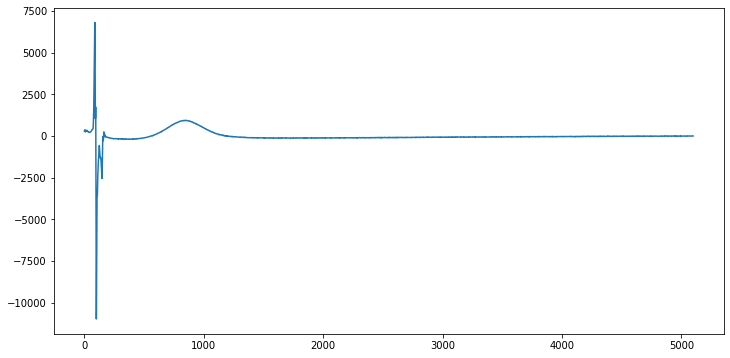

In [81]:
plt.figure(figsize=(12,6))

plt.plot(average_data_31[0,0:5100,0])

plt.show

Plotting all 9 treatments/sheets could look like this:

In [84]:
bokeh.io.output_notebook()  # see comment for bokeh module in "Requirements" section
bfig = bokeh.plotting.figure(plot_width=900, plot_height=400, title='All Treatments')
for sheet in range(9):
    bfig.line(# plot line with it's own color
        list(range(average_data_31.shape[1])), 
        average_data_31[0,:5100,sheet],
        color = Spectral11[sheet], 
        legend_label = "Data_"+str(sheet),
        line_width = 2,
        alpha = 0.8
    )
bfig.legend.location = "top_right"
bfig.legend.click_policy ="hide"
bfig.xaxis.axis_label = 'Sample Index'
bfig.yaxis.axis_label = 'ADC Value'
bfig.ygrid.minor_grid_line_color = 'navy'
bfig.ygrid.minor_grid_line_alpha = 0.1
bokeh.plotting.show(bfig)

Loading BokehJS ...

Plotting the data from all sensors might look like this

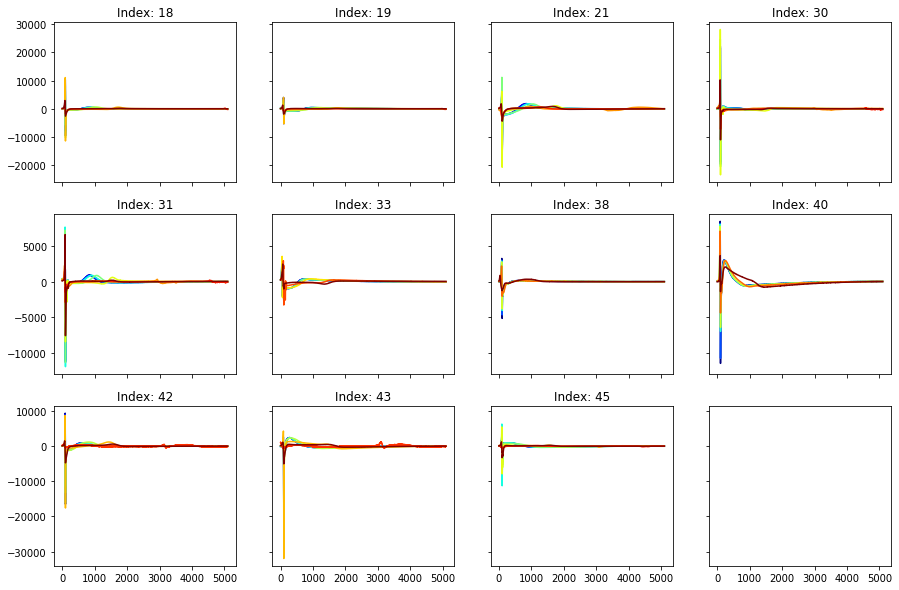

In [85]:
# index_list: see above

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, sharex='col', sharey='row')
fig.set_size_inches(6,6)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

fig.set_size_inches(15,10)

for i in range(len(ax_list)-1):
    x = average_raw_data.recordings[0].segment_streams[0].segment_entity[id_list[i]].data.shape[2]
    color = iter(plt.cm.jet(np.linspace(0,1,x))) # generate as many distinct colors as there are lines that will be plotted
                                                 # you can replace jet with cool or winter or any other matplotlib colormap
    for k in range(x):
            current_average = average_raw_data.recordings[0].segment_streams[0].segment_entity[id_list[i]].data[0,:5100,k]
            c = next(color)  # select color from custom colormap
            ax_list[i].plot(current_average, c = c)
            ax_list[i].set_title("Index: "+str(id_list[i]))
plt.show()

<a href='#Top'>Back to index</a>

### TimestampStream <a id='TS'></a>

As you might have noticed some of the plots already accessed the according timestamps. Depending on your settings these may stand for beginnings and/or ends of certain events.

Accessing the data within a TimestampStream is achieved by calling the **.get_timestamps()** function of a **.timestamp_entity** within **.timestamp_streams**:

In [86]:
timestamps_raw_data = McsPy.McsData.RawData(os.path.join(test_data_folder, '2014-07-09T10-17-35W8 Standard all 500 Hz.h5'))

In [87]:
timestamps = timestamps_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].get_timestamps()
print()

# Array of everything concerning the timestamps of the entity
print(timestamps)
print()

# Just the timestamps
print("Timestamps: ", timestamps[0][0])
print()

# The unit the values are in
print("Unit: ", timestamps[1])

Recording_0 <HDF5 group "/Data/Recording_0" (4 members)>
Stream_0 <HDF5 group "/Data/Recording_0/TimeStampStream/Stream_0" (9 members)>
InfoTimeStamp <HDF5 dataset "InfoTimeStamp": shape (8,), type "|V44">
TimeStampEntity_0 <HDF5 dataset "TimeStampEntity_0": shape (1, 26), type "<i8">
TimeStampEntity_1 <HDF5 dataset "TimeStampEntity_1": shape (1, 23), type "<i8">
TimeStampEntity_2 <HDF5 dataset "TimeStampEntity_2": shape (1, 30), type "<i8">
TimeStampEntity_3 <HDF5 dataset "TimeStampEntity_3": shape (1, 33), type "<i8">
TimeStampEntity_4 <HDF5 dataset "TimeStampEntity_4": shape (1, 29), type "<i8">
TimeStampEntity_5 <HDF5 dataset "TimeStampEntity_5": shape (1, 28), type "<i8">
TimeStampEntity_6 <HDF5 dataset "TimeStampEntity_6": shape (1, 29), type "<i8">
TimeStampEntity_7 <HDF5 dataset "TimeStampEntity_7": shape (1, 26), type "<i8">

(array([[  944000,   954000,   964000,  3030000,  3040000,  3052000,
         3096000,  5104000,  5116000,  5126000,  7204000,  7212000,
         7226000

To illustrate how this data might be used for visualization purposes, we can plot these together with some data from the AnalogStream.

We will use the built-in functions **.get_channel_in_range()** and **.get_channel_sample_timestamps()**

[[  944000   954000   964000  3030000  3040000  3052000  3096000  5104000
   5116000  5126000  7204000  7212000  7226000  9290000  9298000 11376000
  11386000 11442000 13462000 13472000 13528000 15548000 15558000 17634000
  17644000 17686000]]
Time1 (array([      0,    2000,    4000, ..., 5996000, 5998000, 6000000],
      dtype=int64), <Unit('microsecond')>)
Time2 (array([ 100000,  102000,  104000, ..., 6096000, 6098000, 6100000],
      dtype=int64), <Unit('microsecond')>)


Text(0.5, 1.0, "Sampled signal overlay 'Filter (1) Filter Data' and 'Data Acquisition (1) Electrode Raw Data'")

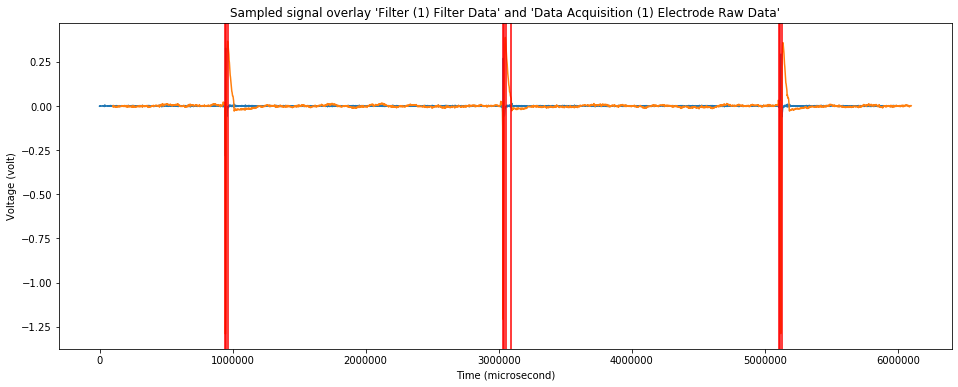

In [88]:
stream1 = event_raw_data.recordings[0].analog_streams[0]
stream2 = event_raw_data.recordings[0].analog_streams[1]
channel_id = list(event_raw_data.recordings[0].analog_streams[1].channel_infos.keys())[0]
timestamps = event_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].get_timestamps()[0]
print(timestamps)

time1 = stream1.get_channel_sample_timestamps(channel_id,0,3000)
print("Time1",time1)
signal1 = stream1.get_channel_in_range(channel_id,0,3000)
time2 = stream2.get_channel_sample_timestamps(channel_id,0,3000)
print("Time2",time2)
signal2 = stream2.get_channel_in_range(channel_id,0,3000)

plt.figure(figsize=(16,6))
plt.plot(time1[0], signal1[0])
plt.plot(time2[0], signal2[0])
max_time = max(time1[0][-1],time2[0][-1])

[plt.axvline(timestamp, color='r') for timestamp in timestamps[0,:] if timestamp < max_time]

plt.xlabel('Time (%s)' % time1[1])
plt.ylabel('Voltage (%s)' % signal1[1])
plt.title('Sampled signal overlay \'%s\' and \'%s\'' % (stream1.label, stream2.label))

<a href='#Top'>Back to index</a>

## Info <a id='I2'></a>

As depicted in the graphical representation of the class structure of the McsData.py module, every stream has an info file associated with it which holds additional information about the data included in the entities of those streams. This additional information can be used for simpler tasks like labeling axes with units stored in the info file or to sort streams according to parameters which are deposited in this kind of file.

Below you find a collection of commands to access the data of the info files.

#### Accessing AnalogStream Info:

In [89]:
print(channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info)

{'ChannelID': 0, 'RowIndex': 0, 'GroupID': 0, 'Label': 'E1', 'RawDataType': 'Int', 'Unit': 'V', 'Exponent': -9, 'ADZero': 0, 'Tick': 2000, 'ConversionFactor': 381470, 'HighPassFilterType': '', 'HighPassFilterCutOffFrequency': '-1', 'HighPassFilterOrder': -1, 'LowPassFilterType': '', 'LowPassFilterCutOffFrequency': '-1', 'LowPassFilterOrder': -1}


In [90]:
print(channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info['ConversionFactor'])

381470


As you can see the data is arranged in a dictionary, so we can get all the keys with **.keys()**

In [91]:
info_keys = channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info.keys()

print(info_keys)

dict_keys(['ChannelID', 'RowIndex', 'GroupID', 'Label', 'RawDataType', 'Unit', 'Exponent', 'ADZero', 'Tick', 'ConversionFactor', 'HighPassFilterType', 'HighPassFilterCutOffFrequency', 'HighPassFilterOrder', 'LowPassFilterType', 'LowPassFilterCutOffFrequency', 'LowPassFilterOrder'])


And we can use this list to iterate over it.

In [92]:
for key in info_keys:
    print("Key:",key,", Value:",channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].info[key])

Key: ChannelID , Value: 0
Key: RowIndex , Value: 0
Key: GroupID , Value: 0
Key: Label , Value: E1
Key: RawDataType , Value: Int
Key: Unit , Value: V
Key: Exponent , Value: -9
Key: ADZero , Value: 0
Key: Tick , Value: 2000
Key: ConversionFactor , Value: 381470
Key: HighPassFilterType , Value: 
Key: HighPassFilterCutOffFrequency , Value: -1
Key: HighPassFilterOrder , Value: -1
Key: LowPassFilterType , Value: 
Key: LowPassFilterCutOffFrequency , Value: -1
Key: LowPassFilterOrder , Value: -1


For AnalogStreams there are some built-in functions you can call on **.channel_infos[index]**. 

- **.adc_step**
- **.channel_id**
- **.row_index**
- **.version**


If sampled data is enclosed in the AnalogStream

- **.sampling_frequency**
- **.sampling_tick**

can be used.

In [93]:
print(channel_raw_data.recordings[0].analog_streams[0].channel_infos[0].sampling_frequency)

500.0 hertz


For Entities **.info.info** reveals additional info.

#### Accessing FrameStream Info:

In [94]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info)

{'FrameID': 1, 'FrameDataID': 0, 'GroupID': 1, 'Label': 'ROI 1', 'RawDataType': 'Short', 'Unit': 'V', 'Exponent': -9, 'ADZero': 0, 'Tick': 50, 'HighPassFilterType': '', 'HighPassFilterCutOffFrequency': '-1', 'HighPassFilterOrder': -1, 'LowPassFilterType': '', 'LowPassFilterCutOffFrequency': '-1', 'LowPassFilterOrder': -1, 'SensorSpacing': 1, 'FrameLeft': 1, 'FrameTop': 1, 'FrameRight': 65, 'FrameBottom': 65, 'ReferenceFrameLeft': 1, 'ReferenceFrameTop': 1, 'ReferenceFrameRight': 65, 'ReferenceFrameBottom': 65}


In [95]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.info['RawDataType'])

Short


In addition there are:

- **.info.frame_id**
- **.info.sensor_spacing**
- **.info.adc_basic_step**
- **.info.adc_step_for_sensor(x, y)** x,y are the coordinates of the sensor. Sensor 1 has (0, 0) sensor 4225 has (64, 64)

In [96]:
print(frame_raw_data.recordings[0].frame_streams[0].frame_entity[1].info.adc_step_for_sensor(0,0))

1e-09 volt


#### Accessing EventStream Info:

In [97]:
print(event_raw_data.recordings[0].event_streams[0].event_entity[0].info.info)

{'EventID': 0, 'GroupID': 0, 'Label': '', 'RawDataType': 'Int', 'RawDataBytes': 4, 'SourceChannelIDs': '8', 'SourceChannelLabels': '1                                         \r\n'}


In [98]:
print(event_raw_data.recordings[0].event_streams[0].event_entity[0].info.info['SourceChannelIDs'])

8


For EventStreams additionaly there are 

- **.info.id**
- **.info.raw_data_bytes**
- **.info.source_channel_ids**
- **.info.source_channel_labels**
- **.info.version** 

#### Accessing SegmentStream Info:

In [99]:
print(average_raw_data.recordings[0].segment_streams[0].segment_entity[31].info.info)

{'SegmentID': 31, 'GroupID': 2, 'Label': 'Avg_31', 'PreInterval': 10000, 'PostInterval': 500000, 'SegmentType': 'Average', 'SourceChannelIDs': '31'}


In [100]:
print(average_raw_data.recordings[0].segment_streams[0].segment_entity[31].info.label)

Avg_31


In [101]:
print(average_raw_data.recordings[0].segment_streams[0].segment_entity[31].info.info['Label'])

Avg_31


For Segments there also are:

- **.info.count**
- **.info.id**
- **.info.post_interval**
- **.info.pre_interval**
- **.info.type**
- **.info.version**

This holds true for cutout and average data alike.

For entities with averages you can use

- **.number_of_averages**
- **.sample_length**
- **.time_ranges**
- **.time_range(index)**
- **.average_counts**
- **.average_count(index)**
- **.segment_sample_count**

In [102]:
print(average_raw_data.recordings[0].segment_streams[0].segment_entity[31].number_of_averages)

9


#### Accessing TimestampStream Info:

In [103]:
print(timestamps_raw_data.recordings[0].timestamp_streams[0].timestamp_entity[0].info.info)

{'TimeStampEntityID': 0, 'GroupID': 0, 'Label': '', 'Unit': 's', 'Exponent': -6, 'SourceChannelIDs': '0', 'SourceChannelLabels': 'E1                                        \r\n'}


And last but not least Timestamps have: 

- **.info.data_type**
- **.info.exponent**
- **.info.id**
- **.info.measuring_unit**
- **.info.source_channel_ids**
- **.info.source_channel_labels**
- **.info.unit**
- **.info.version**

<a href='#Top'>Back to index</a>